In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.feature_selection import mutual_info_classif
import sklearn as sk
from dateutil import parser
path=r"D:\Computer Science\data\tabular-playground-series-sep-2022"

In [2]:
df=pd.read_csv(path+"\\train.csv")
df

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [3]:
df['date']=df['date'].apply(parser.parse)

df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df["year"]=df["date"].dt.year

df=df.drop(["date"],axis=1)
df

,row_id,country,store,product,num_sold,month,day,year
0,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,1,1,2017
1,1,Belgium,KaggleMart,Kaggle Getting Started,615,1,1,2017
2,2,Belgium,KaggleMart,Kaggle Recipe Book,480,1,1,2017
3,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,1,1,2017
4,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,1,1,2017
...,...,...,...,...,...,...,...,...
70123,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,12,31,2020
70124,70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,12,31,2020
70125,70125,Spain,KaggleRama,Kaggle Getting Started,158,12,31,2020
70126,70126,Spain,KaggleRama,Kaggle Recipe Book,135,12,31,2020


In [4]:
df_transform=pd.get_dummies(df)
df_transform

,row_id,num_sold,month,day,year,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,663,1,1,2017,1,0,0,0,0,0,1,0,1,0,0,0
1,1,615,1,1,2017,1,0,0,0,0,0,1,0,0,1,0,0
2,2,480,1,1,2017,1,0,0,0,0,0,1,0,0,0,1,0
3,3,710,1,1,2017,1,0,0,0,0,0,1,0,0,0,0,1
4,4,240,1,1,2017,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,614,12,31,2020,0,0,0,0,0,1,1,0,0,0,0,1
70124,70124,215,12,31,2020,0,0,0,0,0,1,0,1,1,0,0,0
70125,70125,158,12,31,2020,0,0,0,0,0,1,0,1,0,1,0,0
70126,70126,135,12,31,2020,0,0,0,0,0,1,0,1,0,0,1,0


In [10]:
X=df_transform.iloc[:,2:]
y=df_transform["num_sold"]

In [12]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred=lreg.predict(x_train)
lreg.score(x_train,y_train)
mse_train=mean_squared_error(y_train,y_train_pred)
print(f"mean square error of training data, {mse_train}")

mean square error of training data, 3465.6946880301907


In [23]:
lreg.coef_

array([  0.1154018 ,   0.10852221,  11.45851078,  43.19293749,
        20.74766359,  44.42767359,  -6.06359226, -79.31271958,
       -22.99196283,  94.40953014, -94.40953014,  28.89955435,
       -15.53226157, -59.955461  ,  46.58816821])

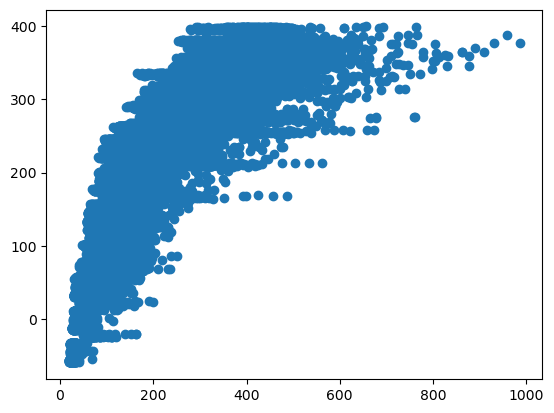

In [18]:
plt.scatter(y_train,y_train_pred)
plt.show()

In [25]:
lreg.score(x_cv,y_cv)
y_cv_pred=lreg.predict(x_cv)
mse_cv=mean_squared_error(y_cv,y_cv_pred)
print(f"mse of cv data, {mse_cv}")

mse of cv data, 3500.4431972495127


In [26]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
v = DictVectorizer(sparse=False)